In [ ]:
import tensorflow as tf

In [ ]:
ls

ngocnet.h5     NgocV2.ipynb  test.p                  train.p
NgocNet.ipynb  PythonUi      traffic-signs-data.zip  valid.p


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/ml ngoc/

/content/drive/My Drive/ml ngoc


In [ ]:
import pickle
with open("./training.pkl","rb") as f:
  [Training_images,Training_labels,Training_names] = pickle.load(f)


In [ ]:
Training_images.shape

(6118, 60, 60, 3)

In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers, utils
import cv2

In [ ]:
import os,cv2
import shutil
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
# plt.imshow(train['features'][11041])

In [ ]:

np.arange(34799)[(train['labels']==9)]



array([11040, 11041, 11042, ..., 12357, 12358, 12359])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
Training_images = Training_images.astype("float")/255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
#start import lib and creating model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [ ]:
width = 60
height =60
classes =43
shape = (width,height,3)
learning_rate = 0.01
epochs =10 
batch_size = 64
opt = SGD(learning_rate=learning_rate,momentum=0.9)


In [ ]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding="same"))  
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# #add one more double layer, then No. of params down 4 times
# model.add(Conv2D(32,(3,3),padding="same"))  
# model.add(Activation("relu"))
# model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding="same"))  
model.add(Activation("relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding="same"))  
model.add(Activation("relu"))
model.add(BatchNormalization())

# model.add(Conv2D(32,(3,3),padding="same"))  
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2,2)))
#

# model.add(Conv2D(64,(3,3),padding="same" ))
# model.add(Activation("relu"))

# model.add(BatchNormalization())

# model.add(Conv2D(64,(3,3),padding="same" ))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# #reduce 3e maxpoolin
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(43))
model.add(Activation("softmax"))

model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0

In [ ]:
model.fit(Training_images, Training_labels,epochs=10)

Epoch 1/10
  7/192 [>.............................] - ETA: 3s - loss: 0.0044 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


192/192 [==============================] - 4s 19ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 2/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 3/10
192/192 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 4/10
192/192 [==============================] - 4s 18ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/10
192/192 [==============================] - 3s 18ms/step - loss: 8.0213e-04 - accuracy: 1.0000
Epoch 6/10
192/192 [==============================] - 4s 18ms/step - loss: 7.9218e-04 - accuracy: 1.0000
Epoch 7/10
192/192 [==============================] - 4s 18ms/step - loss: 6.4069e-04 - accuracy: 1.0000
Epoch 8/10
192/192 [==============================] - 4s 19ms/step - loss: 5.5361e-04 - accuracy: 1.0000
Epoch 9/10
192/192 [==============================] - 4s 19ms/step - loss: 5.8145e-04 - accuracy: 1.0000
Epoch 10/10
192/192 [==============================] - 4s 18ms/step - loss: 4.9429

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model.save('model249.h5')

In [ ]:
Training_labels =  tf.keras.utils.to_categorical(Training_labels)

In [ ]:
import numpy as np
np.shape(Training_images)

(6118, 60, 60, 3)

In [ ]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
np.shape(trainX)

(14228, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

Keep right


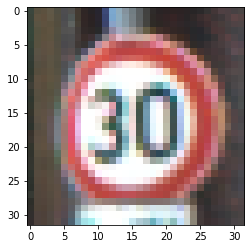

In [ ]:
result = model.predict(testX[1:2])
final =np.argmax(result)
final= classNames[final]
print(final)
plt.imshow(test["features"][1])

In [ ]:
result = model.predict(testX[3:4])
final =np.argmax(result)
final= classNames[final]
print(final)

Turn right ahead


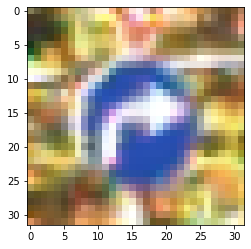

In [ ]:
plt.imshow(test["features"][3])

Right-of-way at the next intersection


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


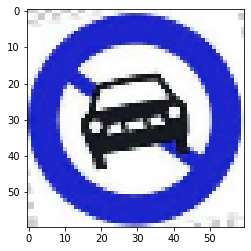

In [ ]:

testimg = cv2.imread(r'./testImg/camoto.jpg')
testimg = cv2.resize(testimg, (60, 60))
testimg = np.array(testimg)
testArray = np.zeros((1, 60, 60, 3))
testArray[0] = testimg
testArray = testArray.astype("float") / 255.0


result2 = model.predict(testArray[0:1])
final2 = np.argmax(result2)
final2 = classNames[final2]
print(final2)
plt.imshow(testimg)


In [ ]:
[0.1,0.2,0.3 0.43]

In [ ]:
ls

ngocnet.h5     NgocV2.ipynb  testImg/  traffic-signs-data.zip  valid.p
NgocNet.ipynb  PythonUi      test.p    train.p
